In [1]:
import pandas as pd
import numpy as np
# Matplotlib and seaborn for visualizations
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.core.pylabtools import figsize
import matplotlib.lines as mlines

import seaborn as sns

# Standard machine learning models
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Scikit-learn utilities
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, roc_auc_score, roc_curve

import itertools

pd.options.mode.chained_assignment = None

import matplotlib as mpl

from warnings import filterwarnings
filterwarnings('ignore')

In [5]:
# Read in data and display first 5 lines
data = pd.read_csv('https://raw.githubusercontent.com/WillKoehrsen/eecs-491/master/assign/project/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
# Impute Missing Values
data['Glucose'] = data['Glucose'].replace({0: data['Glucose'].median()})
data['BloodPressure'] = data['BloodPressure'].replace({0: data['BloodPressure'].median()})
data['SkinThickness'] = data['SkinThickness'].replace({0: data['SkinThickness'].median()})
data['Insulin'] = data['Insulin'].replace({0: data['Insulin'].median()})
data['BMI'] = data['BMI'].replace({0: data['BMI'].median()})

In [7]:
# Extract the features and the labels
features = data.drop(columns='Outcome')
labels = data.Outcome

# Split into training and testing set using 200 observations for testing
X, X_test, y, y_test = train_test_split(features, labels, test_size=200, random_state = 50)

print(X.shape)
print(X_test.shape)

(568, 8)
(200, 8)


Naive Baseline

In [8]:
y.value_counts()

0    373
1    195
Name: Outcome, dtype: int64

In [10]:
# Calculate the accuracy and f1 score of a model
def calc_metrics(predictions, y_test):
    accuracy = np.mean(predictions == y_test)
    f1_metric = f1_score(y_test, predictions)

    print('Accuracy of Model: {:.2f}%'.format(100 * accuracy))
    print('F1 Score of Model: {:.4f}'.format(f1_metric))

In [11]:
# Make naive baseline and evaluate metrics
baseline_pred = [0 for _ in range(len(y_test))]
calc_metrics(baseline_pred, y_test)

Accuracy of Model: 63.50%
F1 Score of Model: 0.0000


In [13]:
# Visualize a confusion matrix as a plot given the confusion matrix
def plot_confusion_matrix(cm, classes = ['No Diabetes', 'Diabetes'],
                          title='Diabetes Confusion matrix',
                          cmap=plt.cm.Reds):
    
    # Display the matrix in text form
    print('Confusion matrix')
    print(cm)
    figsize(8, 8)
    
    # Show the matrix using the imshow functionality
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 20)
    
    # Tick marks show classes
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 12)
    plt.yticks(tick_marks, classes, rotation = 90, size = 12)

    # Formatting for text labels on plot
    fmt1 = 's'
    fmt2 = 'd'
    thresh = cm.max() / 2.
    
    # Four types of classifications
    types = [['True Negative', 'False Positive'],
             ['False Negative', 'True Positive']]
    
    # Add the actual numbers and the types onto the heatmap plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i - 0.05, format(types[i][j], fmt1),
                 horizontalalignment="center", size = 18,
                 color="white" if cm[i, j] > thresh else "black")
        
        plt.text(j, i + 0.15, format(cm[i, j], fmt2),
                 horizontalalignment="center", size = 24,
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label', size = 16)
    plt.xlabel('Predicted Label', size = 16)

Confusion matrix
[[127   0]
 [ 73   0]]


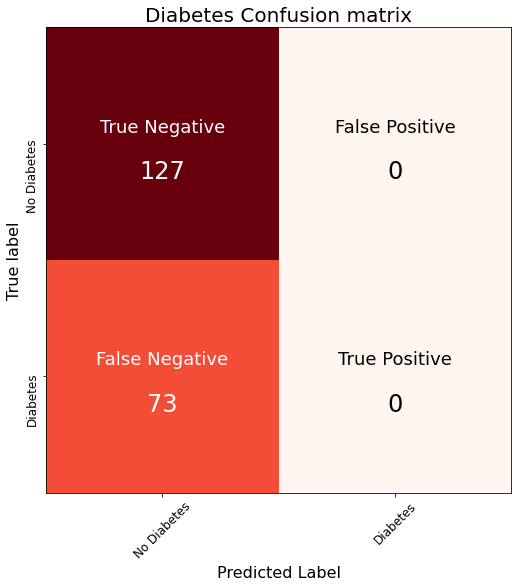

In [14]:
cm = confusion_matrix(y_test, baseline_pred)
plot_confusion_matrix(cm)

Evaluate Standard Machine Learning Methods

Logistic Regression

In [15]:
# Make logistic regression model and fit
lr = LogisticRegressionCV(Cs= 20, cv = 3, scoring = 'f1', 
                          penalty = 'l2', random_state = 42)
lr.fit(X, y)

# Make predictions and evaluate
lr_pred = lr.predict(X_test)
calc_metrics(lr_pred, y_test)

Accuracy of Model: 74.00%
F1 Score of Model: 0.5667


In [17]:
# Determine the roc curve and the auc and display
def calc_roc(probs, y_test):
  # Calculate the area under the roc curve
  auc = roc_auc_score(y_test, probs)
  # Calculate metrics for the roc curve
  fpr, tpr, thresholds = roc_curve(y_test, probs)
  
  plt.style.use('bmh')
  plt.figure(figsize = (8, 8))
  
  # Plot the roc curve
  plt.plot(fpr, tpr, 'b')
  plt.xlabel('False Positive Rate', size = 16)
  plt.ylabel('True Positive Rate', size = 16)
  plt.title('Receiver Operating Characteristic Curve, AUC = %0.4f' % auc, 
            size = 18)

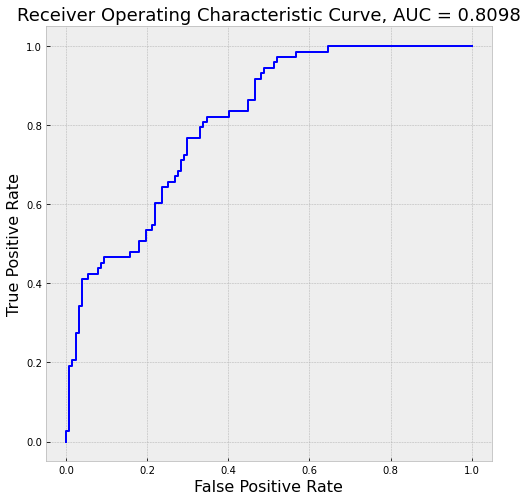

In [18]:
lr_pred_proba = lr.predict_proba(X_test)[:, 1]
calc_roc(lr_pred_proba, y_test)

Dataset

In [19]:
# Read in data and display first 5 lines
data = pd.read_csv('https://raw.githubusercontent.com/WillKoehrsen/eecs-491/master/assign/project/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Impute Missing Values

In [20]:
data['Glucose'] = data['Glucose'].replace({0: data['Glucose'].median()})
data['BloodPressure'] = data['BloodPressure'].replace({0: data['BloodPressure'].median()})
data['SkinThickness'] = data['SkinThickness'].replace({0: data['SkinThickness'].median()})
data['Insulin'] = data['Insulin'].replace({0: data['Insulin'].median()})
data['BMI'] = data['BMI'].replace({0: data['BMI'].median()})

In [21]:
# Extract the features and the labels
features = data.drop(columns='Outcome')
labels = data.Outcome

# Split into training and testing set using 200 observations for testing
X, X_test, y, y_test = train_test_split(features, labels, test_size=200, random_state = 50)

print(X.shape)
print(X_test.shape)

(568, 8)
(200, 8)


Naive Baseline

In [22]:
y.value_counts()

0    373
1    195
Name: Outcome, dtype: int64

In [23]:
# Make naive baseline and evaluate metrics
baseline_pred = [0 for _ in range(len(y_test))]
calc_metrics(baseline_pred, y_test)

Accuracy of Model: 63.50%
F1 Score of Model: 0.0000


Confusion matrix
[[127   0]
 [ 73   0]]


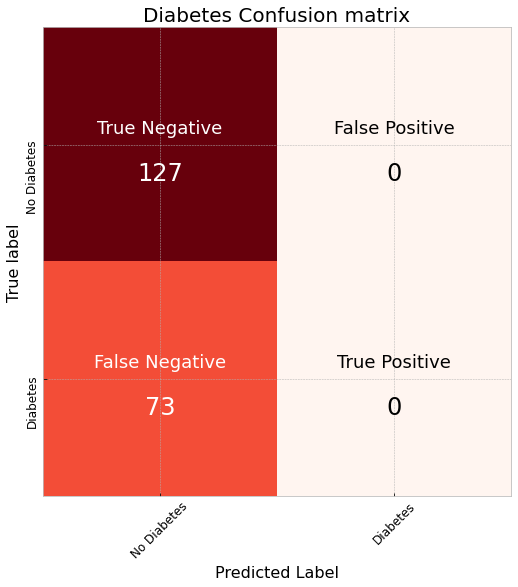

In [24]:
cm = confusion_matrix(y_test, baseline_pred)
plot_confusion_matrix(cm)

Logistic Regression

In [25]:
# Make logistic regression model and fit
lr = LogisticRegressionCV(Cs= 20, cv = 3, scoring = 'f1', 
                          penalty = 'l2', random_state = 42)
lr.fit(X, y)

# Make predictions and evaluate
lr_pred = lr.predict(X_test)
calc_metrics(lr_pred, y_test)

Accuracy of Model: 74.00%
F1 Score of Model: 0.5667


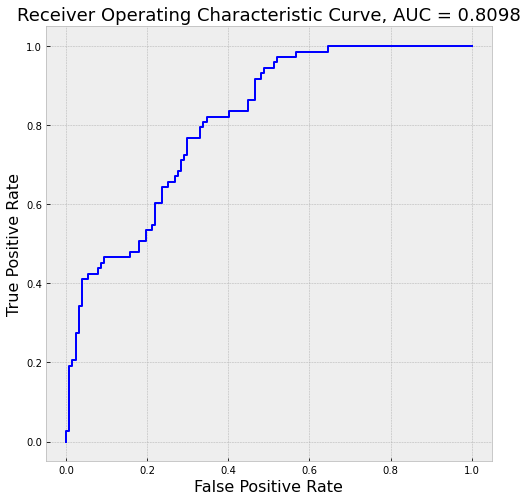

In [26]:
lr_pred_proba = lr.predict_proba(X_test)[:, 1]
calc_roc(lr_pred_proba, y_test)

Random Forest

In [27]:
# Create and fit the random forest
rf = RandomForestClassifier(n_estimators=100, random_state = 42)
rf.fit(X, y)

# Evaluate predictions
rf_pred = rf.predict(X_test)
calc_metrics(rf_pred, y_test)

Accuracy of Model: 73.50%
F1 Score of Model: 0.5954


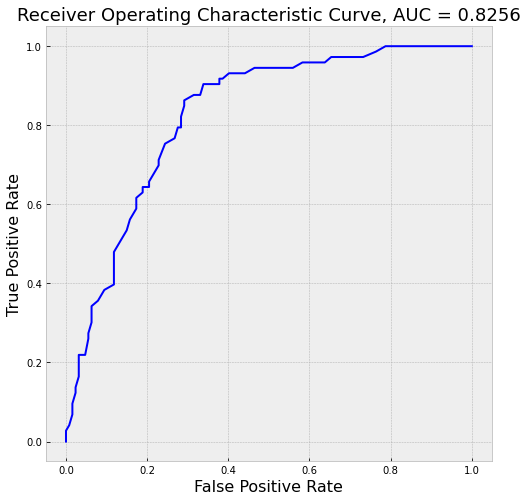

In [28]:
# ROC for random forest
rf_pred_proba = rf.predict_proba(X_test)[:, 1]
calc_roc(rf_pred_proba, y_test)

Support Vector Machine Classifier

In [29]:

# Need to scale features for support vector classifier
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

# Create support vector classifier and fit
svc = SVC(C = 10, gamma = 0.001, probability=True,
          random_state = 42)
svc.fit(X_scaled, y)

# Make predictions and evaluate
svc_pred = svc.predict(X_test_scaled)
calc_metrics(svc_pred, y_test)

Accuracy of Model: 74.00%
F1 Score of Model: 0.5593


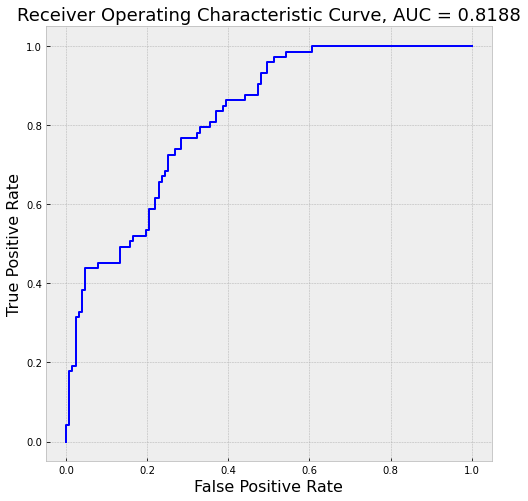

In [30]:
# Predict probabilities and calculate roc and auc
svc_pred_proba = svc.predict_proba(X_test_scaled)[:, 1]
calc_roc(svc_pred_proba, y_test)